# Loan Data from Prosper

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
df=pd.read_csv('prosperLoanData.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
# see number of null values on each columns
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [8]:
#check for duplicates
sum(df.duplicated())

0

In [9]:
#What is the structure of your dataset?

In [10]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

### What is the structure of your dataset?
There are 113937 loan records in this dataset with 81 features. Rows = 113,937 and Columns = 81

### What is/are the main feature(s) of interest in your dataset?
I'm most interested in what features are important in predicting the LoanStatus in the dataset. Specifically what features are important in predicting whether a loan will be defaulted, completed or chargedoff.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that EmploymentStatus and IncomeVerifiable will be the most important features in predicting the LoanStatus. I also think that other features like;

- ListingCategory
- CreditScoreRangeLower
- CreditScoreRangeUpper
- EmploymentStatus
- IsBorrowerHomeowner
- CurrentlyInGroup
- IncomeVerifiable
- Recommendations
- InvestmentFromFriendsCount
- LP_CustomerPrincipalPayments(Cummulative Principal Payments made on the loan before being charged off)

will also be important in predicting the LoanStatus albeit to a much lesser extent.

## Univariate Exploration

### 1.Loan status

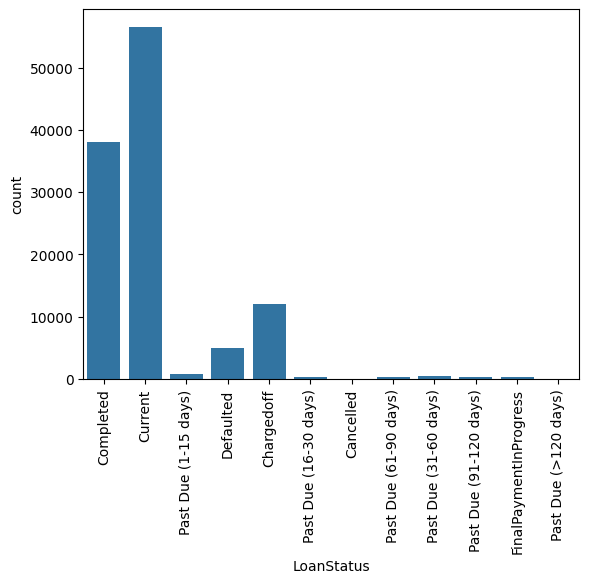

In [15]:
# setting color
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)
sb.countplot(data =df, x = 'LoanStatus', color = base_color);

- The plot shows that more than 50,000 individuals has a loan with Prosper, and quite a number has completed the loan. The number of past due and cancelled are quite low

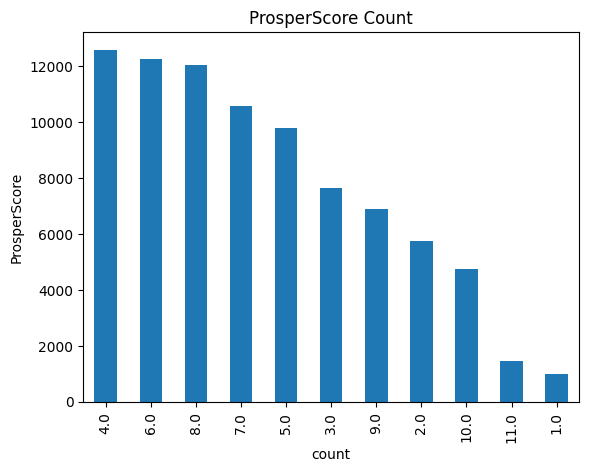

In [17]:
# see which ProsperScore borrowers received the most

df['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('count')
plt.ylabel('ProsperScore')
plt.fontsize = 12
plt.figsize=(12,12)

- Looks like most borrower are given with low score. The lower the score, the higher borrower counts it has.

### Occupation

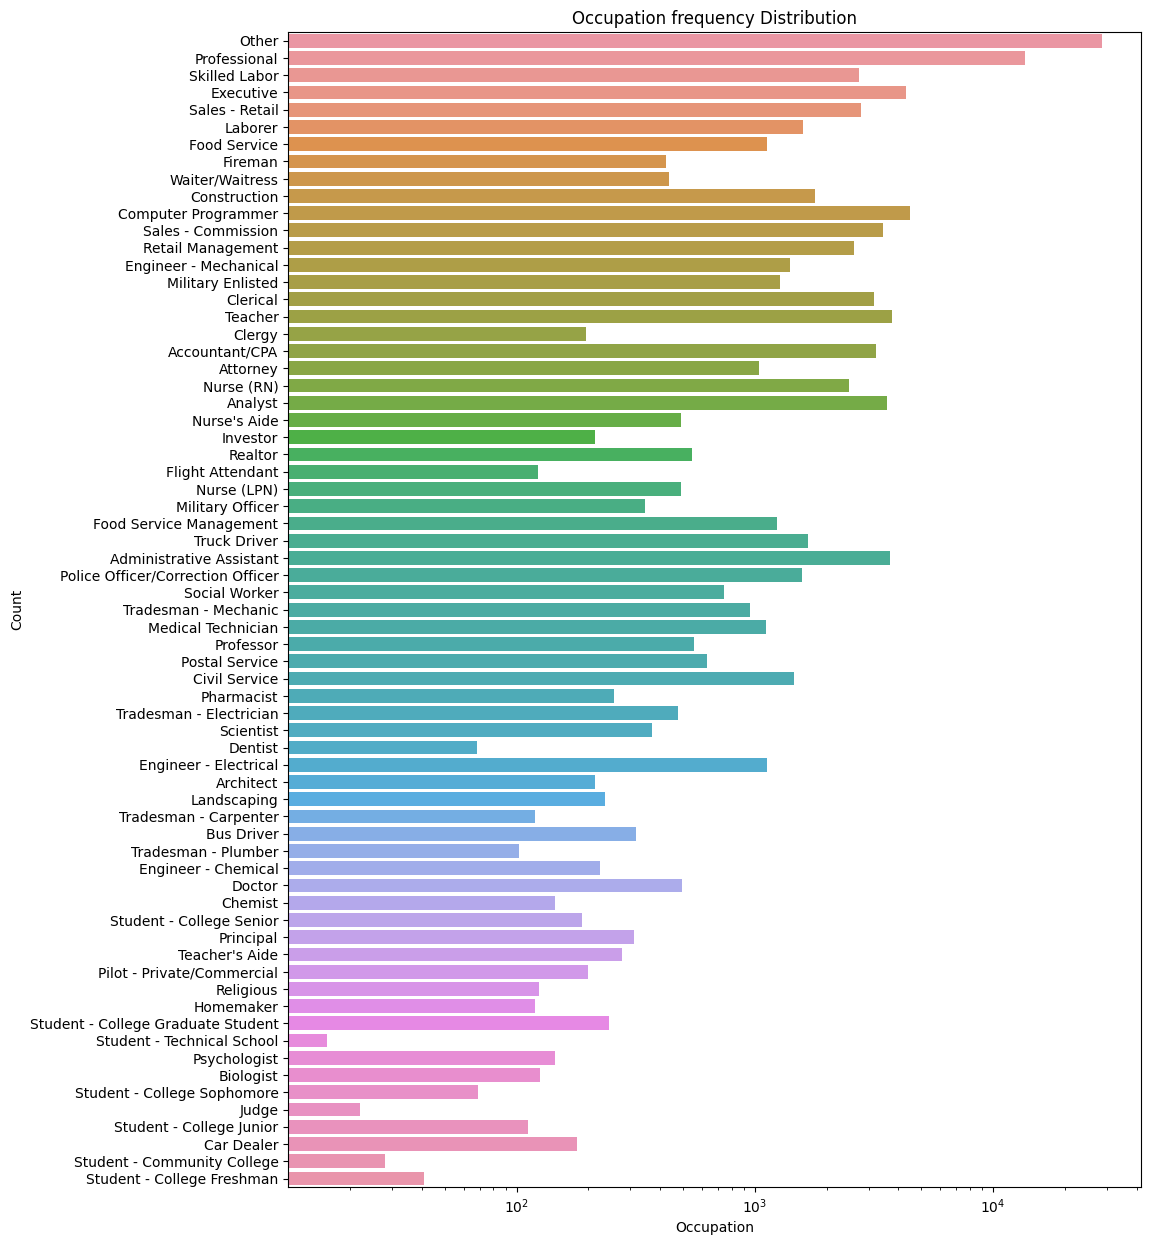

In [16]:
plt.figure(figsize=[11,15]);
sb.countplot(data = df, y = 'Occupation');
plt.title('Occupation frequency Distribution');
plt.ylabel('Count');
plt.xlabel('Occupation');
plt.xscale('log');

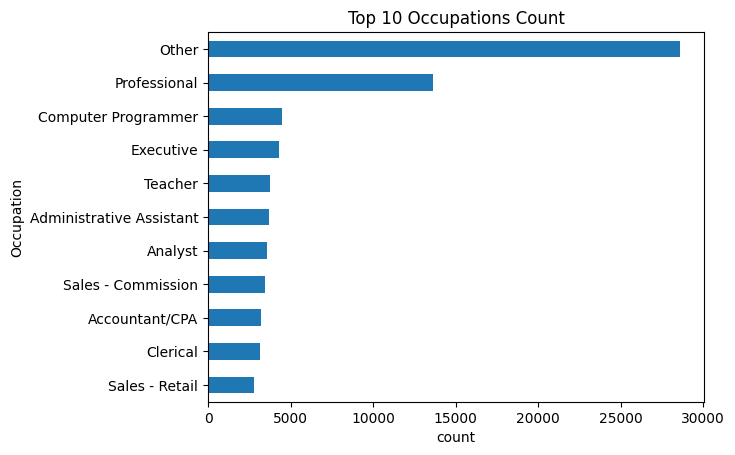

In [17]:
# see the top 10 occupations of borrowers

df['Occupation'].value_counts()[10::-1].plot(kind='barh')
plt.title('Top 10 Occupations Count')
plt.xlabel('count')
plt.ylabel('Occupation')
plt.fontsize = 12
plt.figsize=(10,6)

- Top 10 Occupations Count: most borrowers enter their occupations as "others" or "professional" because they might not want to share this information. The rest of the occupations do not show big increase compare to others.

### Employment status

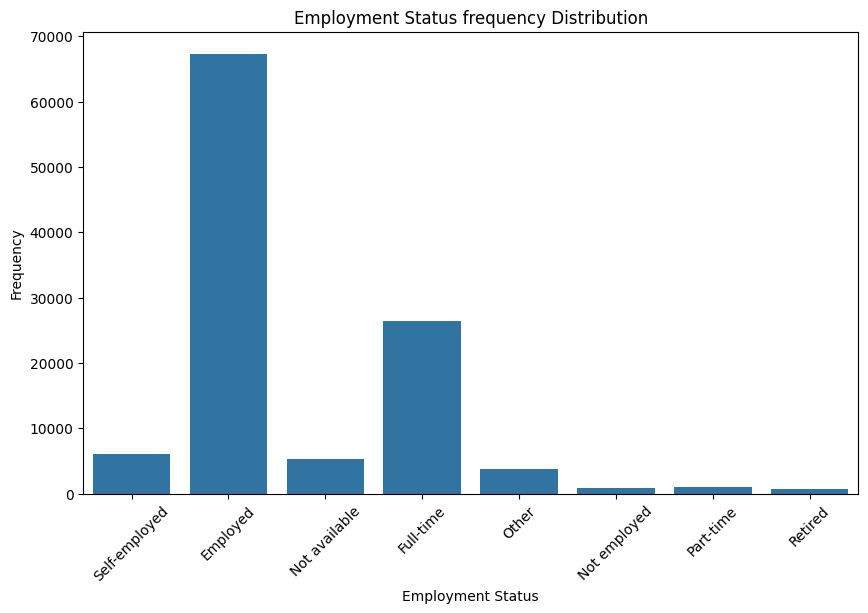

In [25]:
colorChoice = sb.color_palette()[0]

plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'EmploymentStatus', color = colorChoice);
plt.title('Employment Status frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

- The plot shows that it is rare that unemployed individual can obtain a loan from Prosper.

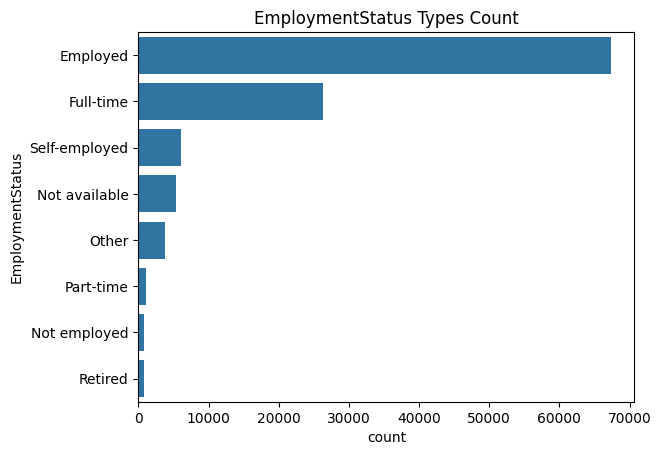

In [26]:
order = df['EmploymentStatus'].value_counts().index
sb.countplot(data = df , y = 'EmploymentStatus' , color =base_color , order = order);
plt.title('EmploymentStatus Types Count');

<AxesSubplot: xlabel='Occupation'>

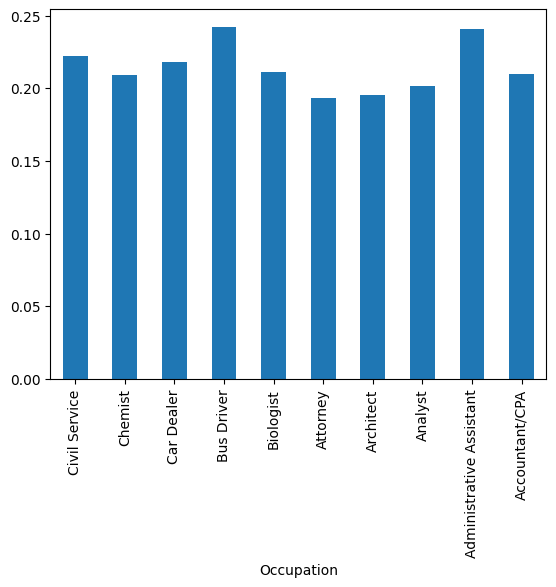

In [28]:
# bar plot for APR means for each top 10 occupations.

Top_Occupation = df.groupby('Occupation').BorrowerAPR.mean()[9::-1]
Top_Occupation.plot(kind = 'bar')

- It is interesting to find out who the top occupations are. But all these occupations have about same BorrowerAPR values. Therefore occupation is not the best factor to analyze the BorrowerAPR because it is unclear and many other reasons should also be considers to be analyzed.

### Income range

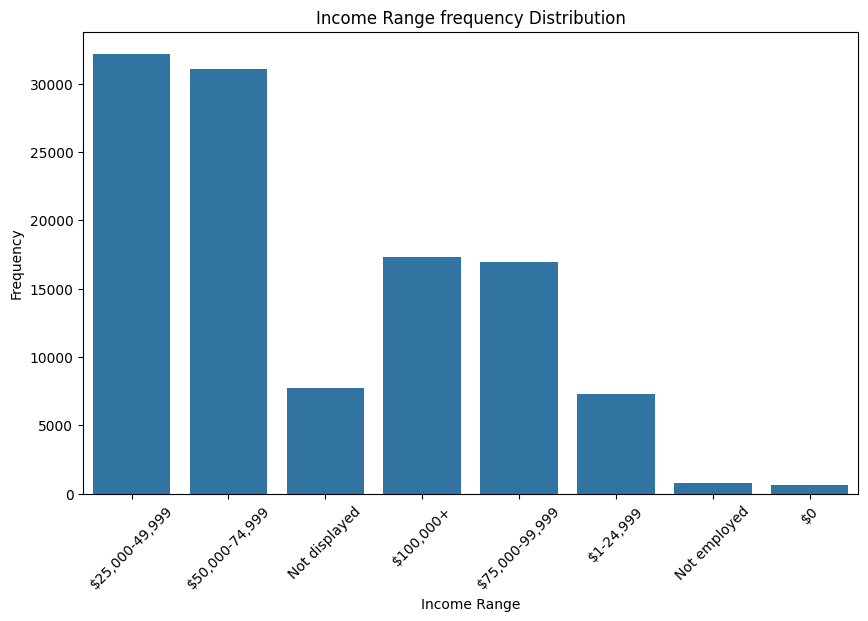

In [29]:
plt.figure(figsize=[10, 6]);
sb.countplot(data = df, x = 'IncomeRange', color = colorChoice);
plt.title('Income Range frequency Distribution');
plt.ylabel('Frequency');
plt.xlabel('Income Range');
plt.xticks(rotation=45);

- The plot shows that most individual who has a loan has an income range from 25k to 75k. However, this plot cannot find any trend related to the amount of income against getting a loan. This plot simply reflects the distribution of income range for people who can obtain a loan.

### Borrower APR

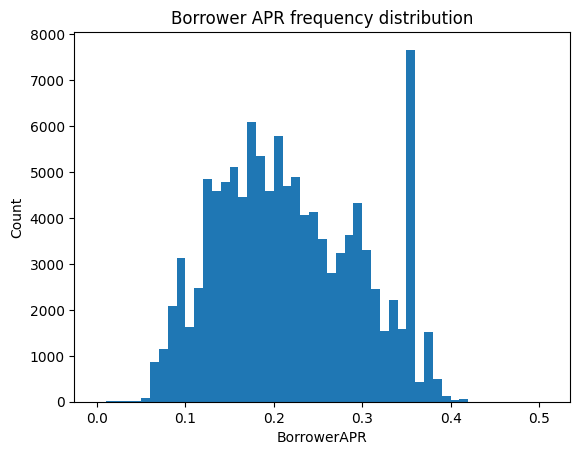

In [12]:
b = np.arange(0,df['BorrowerAPR'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerAPR', bins = b);

plt.title('Borrower APR frequency distribution');
plt.xlabel('BorrowerAPR');
plt.ylabel('Count');

- The plot looks not too skewed. The peak is at around 0.2 and there is another peak at 0.35, which is the highest peak.

### BorrowerRate

In [32]:
df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

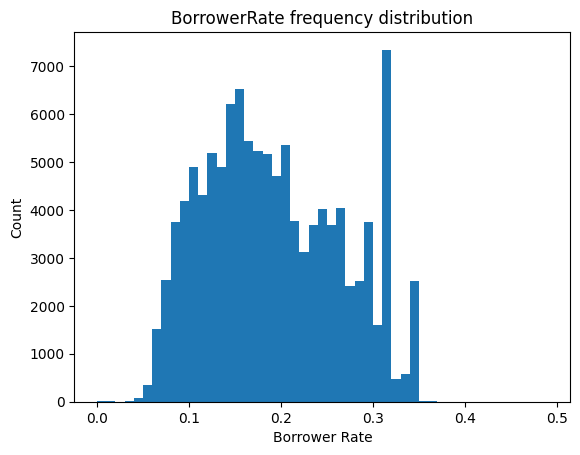

In [34]:
b = np.arange(0,df['BorrowerRate'].value_counts().index.max(),0.01)
plt.hist(data = df, x = 'BorrowerRate', bins = b);

plt.title('BorrowerRate frequency distribution');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

- The peak is at around 0.15 and there is another peak a little over 0.3, which is the highest peak.

## Bivariate Exploration

### Borrower Rate vs. Employment status

and

### Borrower Rate vs. Income Range

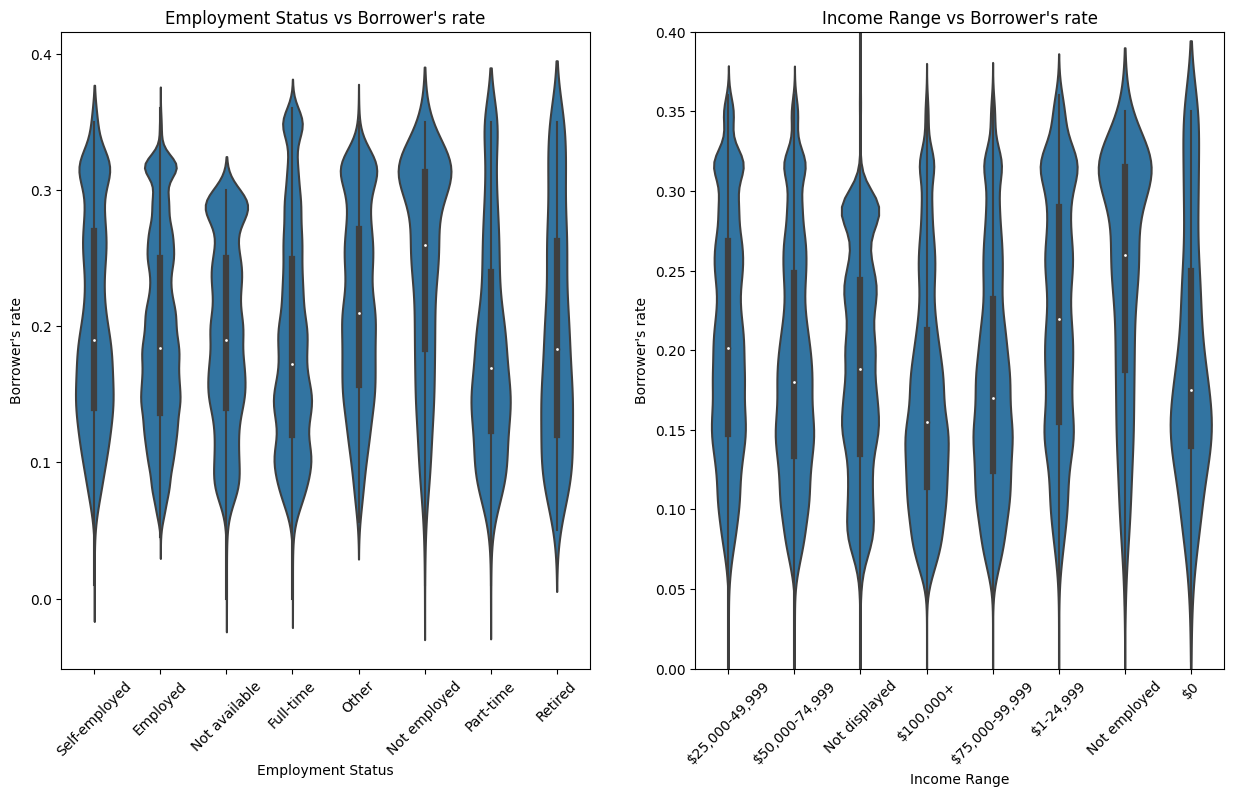

In [37]:
# bivariate plots of total loan amount vs employment status and income range
plt.figure(figsize=[15, 8.27]);
colorChoice = sb.color_palette()[0]

plt.subplot(1,2,1)
sb.violinplot(data = df, x = 'EmploymentStatus', y = 'BorrowerRate', color=colorChoice);
plt.title('Employment Status vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Employment Status');
plt.xticks(rotation=45);

plt.subplot(1,2,2)
sb.violinplot(data = df, x = 'IncomeRange', y = 'BorrowerRate', color=colorChoice);
plt.title('Income Range vs Borrower\'s rate');
plt.ylabel('Borrower\'s rate');
plt.xlabel('Income Range');
plt.xticks(rotation=45);
plt.ylim(0,0.4);

- People who are employed don't necessarily have lower rate. But unemployment does have a higher median rate and higher concentrate of frequency are above the median. Looking at the income range plot, there is a slight trend that median rate is lower, the higher the income range is. It seems like income range is part of a determining factor for the rate a borrower will get.

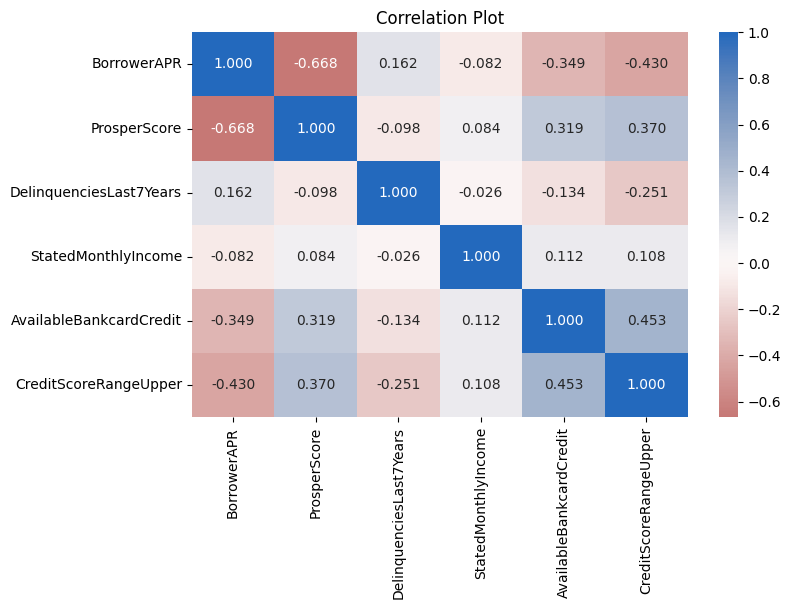

In [36]:
# correlation

num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

- There are no strong positive relationships between any pairs. It makes sense because higher AvailableBankcardCredit has better creditscore. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.

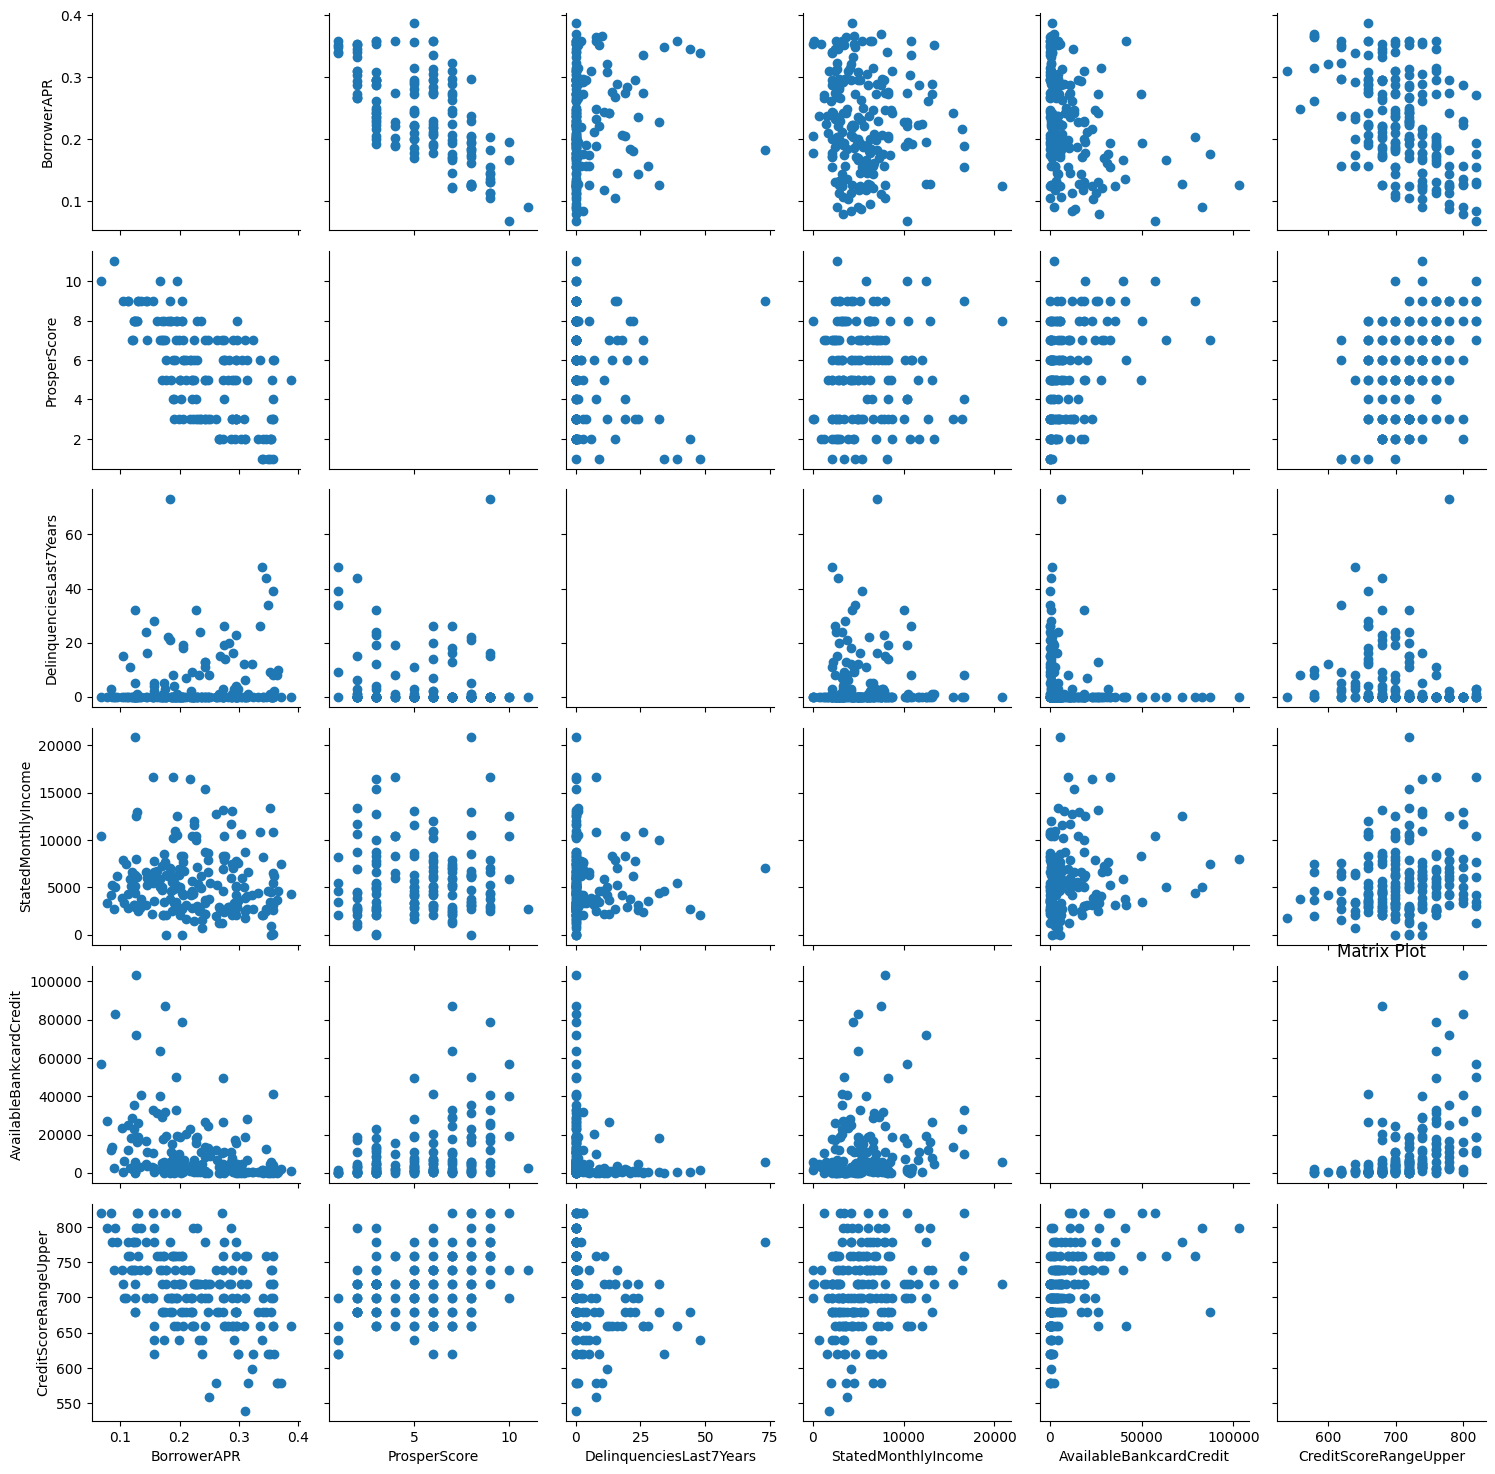

In [46]:

num_vars = ['BorrowerAPR', 'ProsperScore', 'DelinquenciesLast7Years', 
            'StatedMonthlyIncome', 'AvailableBankcardCredit', 'CreditScoreRangeUpper']

samples = np.random.choice(df.shape[0], 200, replace = False)
loan_samp = df.loc[samples,:]

g = sb.PairGrid(data = loan_samp, vars = num_vars)
g.map_offdiag(plt.scatter)
plt.title('Matrix Plot');


#### Occupation against borrower's rate

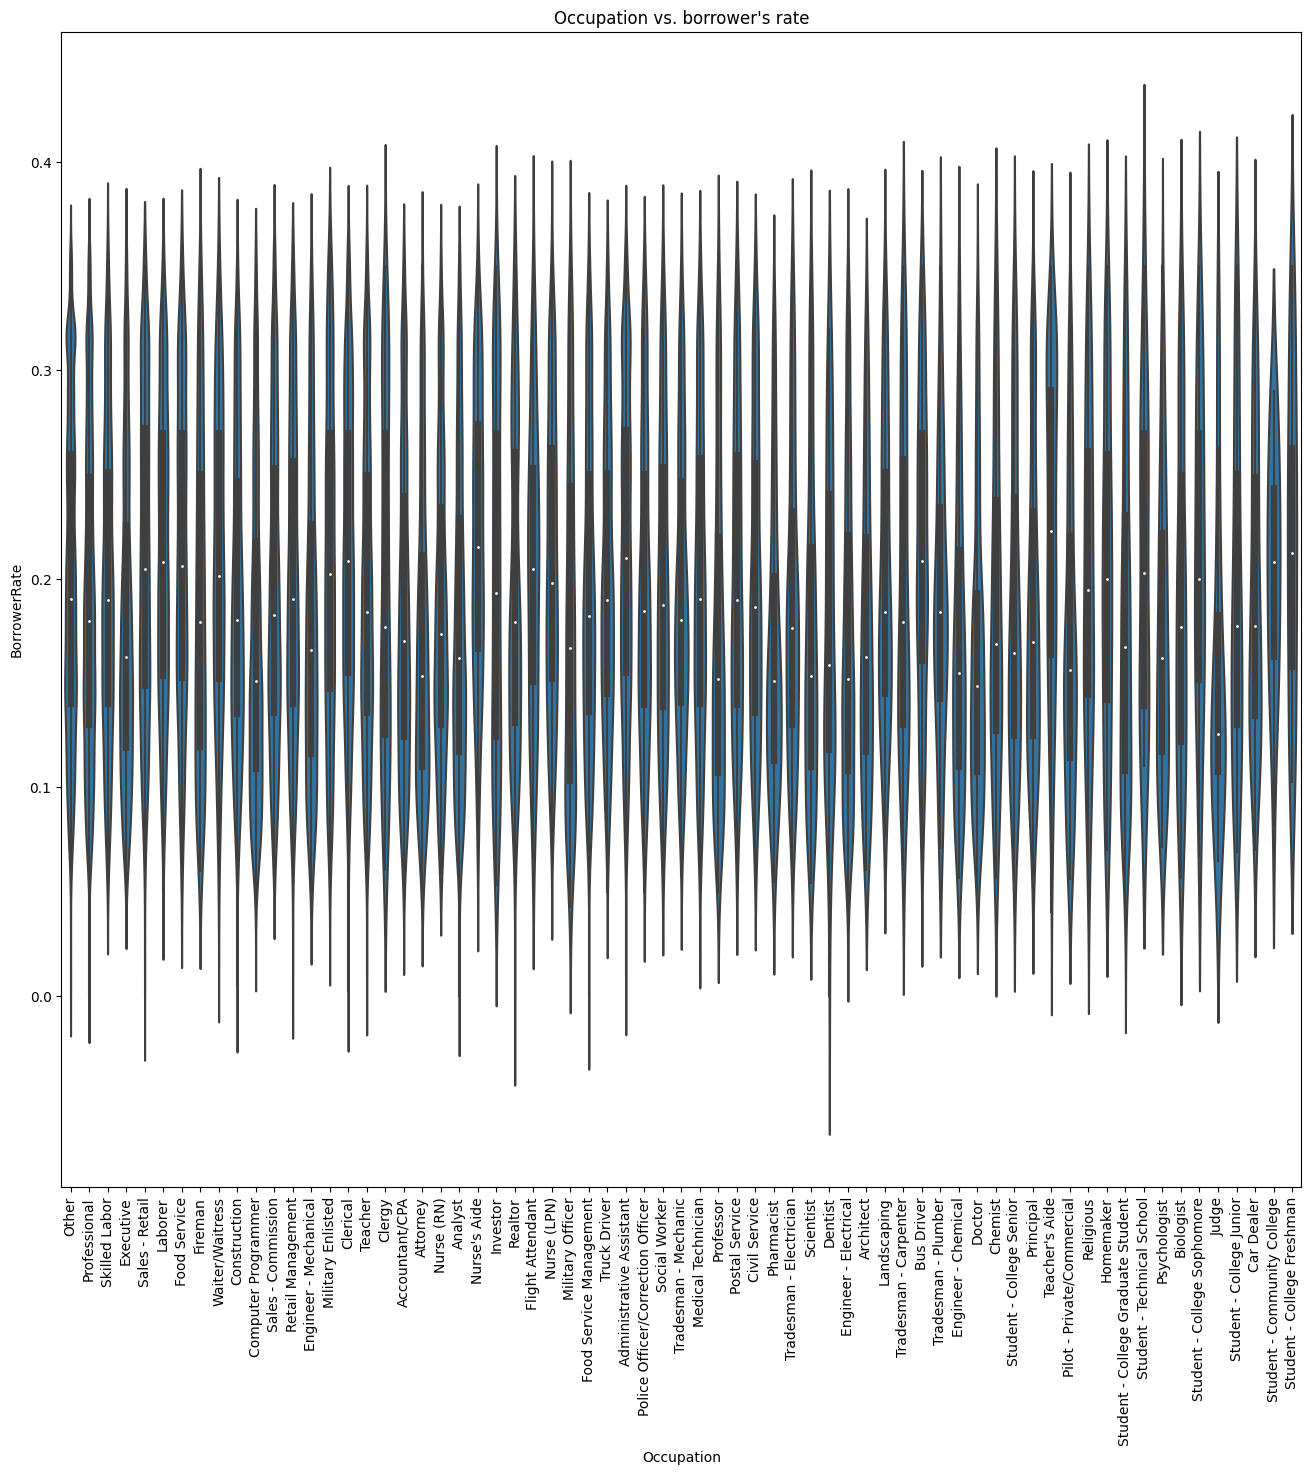

In [48]:
plt.figure(figsize=[16, 15]);
sb.violinplot(data = df, x = 'Occupation', y = 'BorrowerRate', color=colorChoice);
plt.xticks(rotation = 'vertical');
plt.title('Occupation vs. borrower\'s rate');

- The plot shows that it seems like occupation a factor in the borrower's rate. I notice that occupation will lower average salary such as clerical, nurse's aid, bus driver and teacher's aide all have higher median rate.

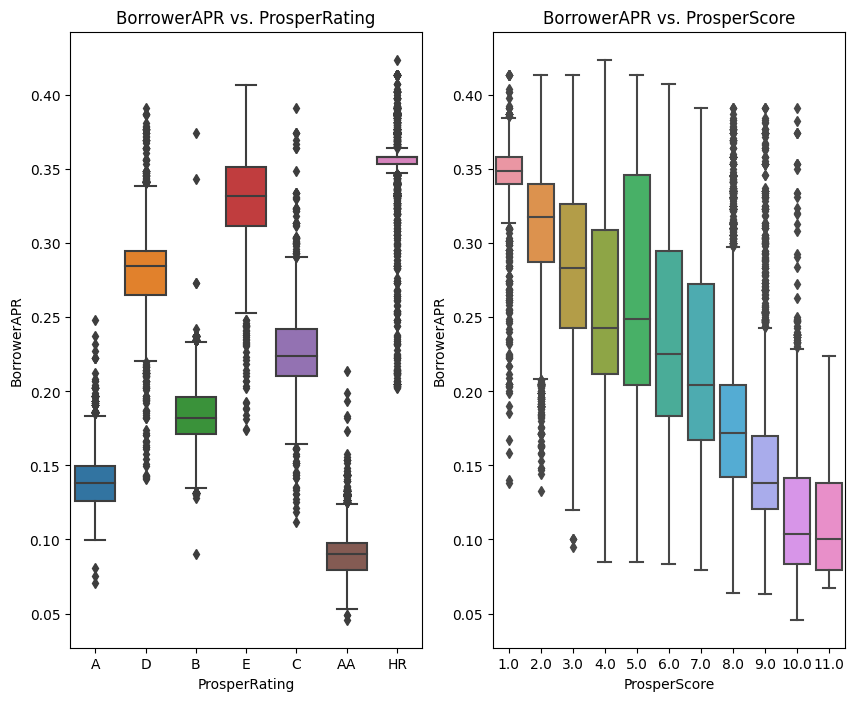

In [50]:
# Violin plot for BorrowerAPR vs. ProsperRating & ProsperScore. Shows higher rating has lower BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

plt.subplot(1, 2, 2)
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

- For these two categorical variables, there is not much correlation on ProsperRating. Good or bad rating doesn't reflect the percentage of APR the borrower will get. For ProsperScore, there are clearly negative relationship with BorrowerAPR as discussed in Univariate Exploration.

### Yearly Borrower Rates

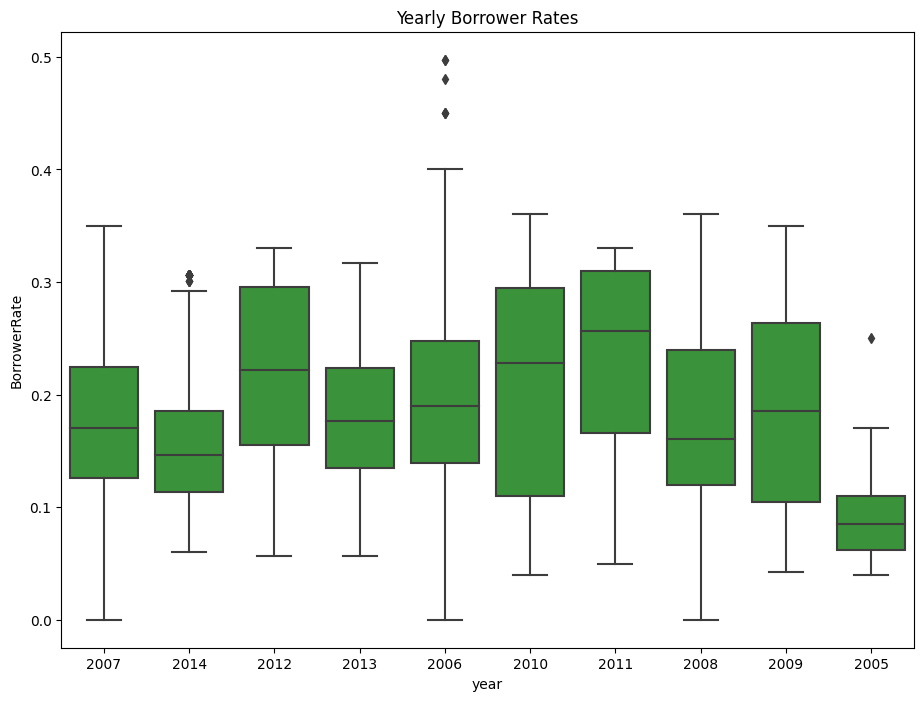

In [55]:
df['year'] = df['ListingCreationDate'].astype(str).str[:4]
plt.figure(figsize=[11, 8]);
base_color = sb.color_palette()[2];
sb.boxplot(data = df, x = 'year', y = 'BorrowerRate', color = base_color);
plt.title('Yearly Borrower Rates');

- The rate goes high up after 2008 until 2011. And since then, the rate is steadily come down until 2014.

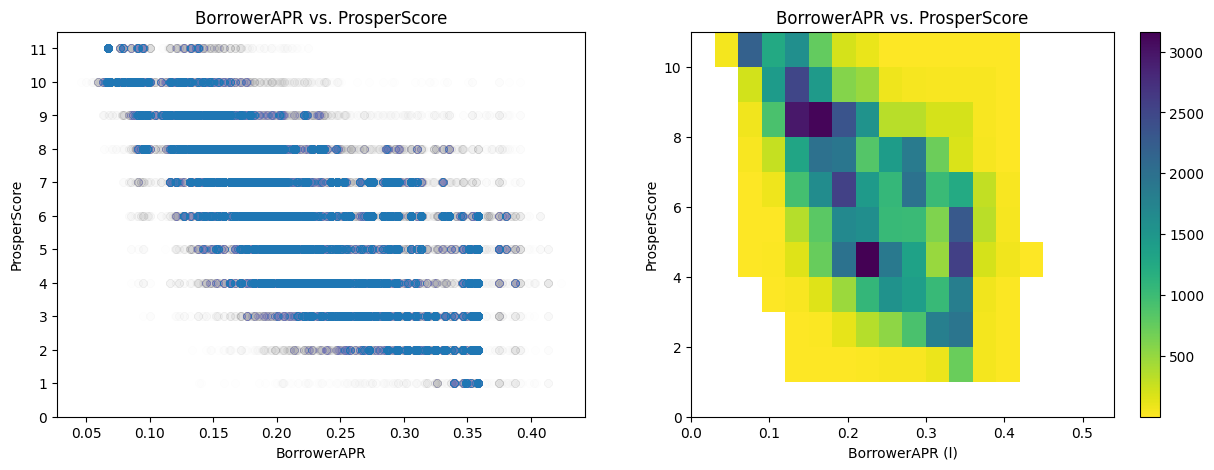

In [64]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [15, 5]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore')


plt.subplot(1, 2, 2)
bins_x = np.arange(0, df['BorrowerAPR'].max()+0.05, 0.03)
bins_y = np.arange(0, df['ProsperScore'].max()+1, 1)
plt.hist2d(data = df, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR (l)')
plt.ylabel('ProsperScore');

- BorrowerAPR vs. CreditScoreRangeUpper: even though the the pts are all over the plot. with the help of alpha feature, we can still see the trend that the higher the CreditScore leads to lower APR percentage. The heatmap on the same variables helps to make this point more clear.

## Multivariate Exploration

### Year borrower's rate vs. ProsperScore vs. isHomeOwner

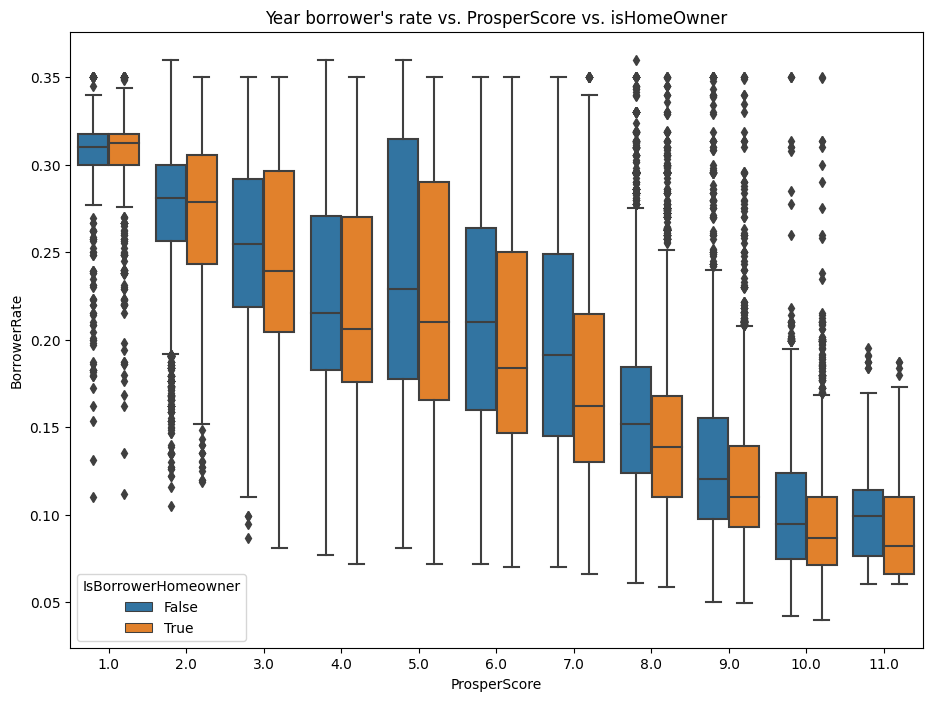

In [70]:
plt.figure(figsize=[11, 8]);
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner');
plt.title('Year borrower\'s rate vs. ProsperScore vs. isHomeOwner');

* For score 5 or above, homeowners have lower rate, and for scores below 5, homeowners have similar or higher borrowing rate.

### Yearly Borrower rate vs. isHomeOwner

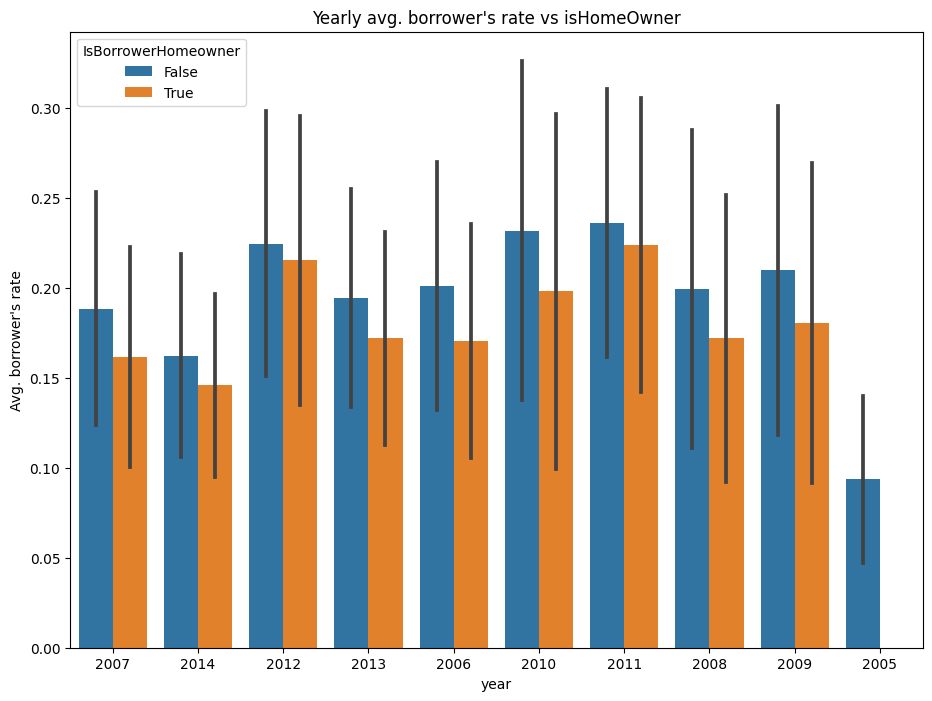

In [72]:
plt.figure(figsize=[11, 8]);
sb.barplot(data = df, x = 'year', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci = 'sd');
plt.ylabel('Avg. borrower\'s rate');
plt.title('Yearly avg. borrower\'s rate vs isHomeOwner');

- Looks like homeowners have a slightly lower rate that non-homeowners.

### Year borrower's rate vs. ProsperScore vs. IncomeRange3

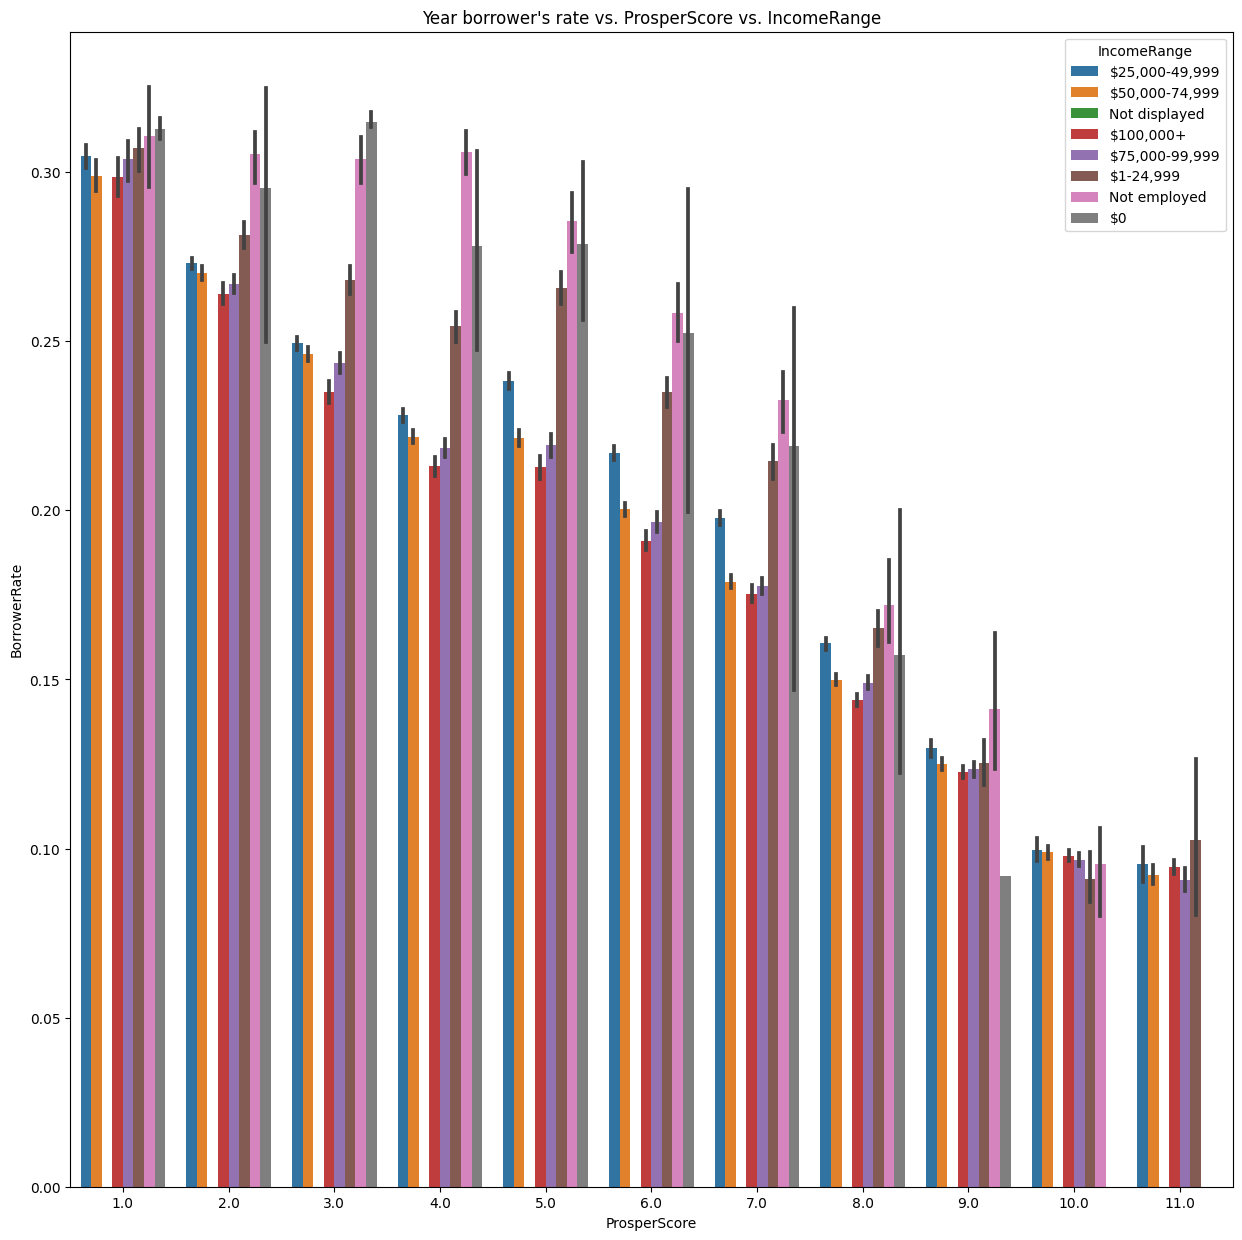

In [73]:
plt.figure(figsize=[15, 15]);
sb.barplot(data = df, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange');
plt.title('Year borrower\'s rate vs. ProsperScore vs. IncomeRange');

- This plot gives a clear indication that the higher the income, the lower the rate will be. As for those unemployed, the rate will be signficantly higher than those who are employed

In [ ]:
!jupyter nbconvert 'exploration' --to slides --post serve

[NbConvertApp] Converting notebook exploration.ipynb to slides
[NbConvertApp] Writing 2666015 bytes to exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/exploration.slides.html
Use Control-C to stop this server
404 GET /favicon.ico (127.0.0.1) 0.81ms
